## Lab8. Audio corpus creation and binary classification using DNN

### 1. Create a Dataset

Dataset is created

### 2. Read the Audio

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import glob

from IPython.display import Audio
import IPython.display as ipd

import librosa
import librosa.display

from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
paths = "audio_file/n3.wav"

Audio(paths)

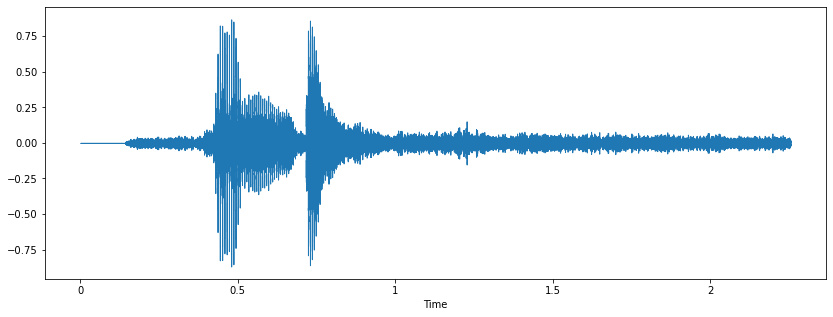

In [3]:
data, sample_rate = librosa.load(paths)
plt.figure(figsize=(14,5))

librosa.display.waveshow(data, sr=sample_rate)
plt.show()

In [4]:
sample_rate

22050

In [5]:
data

array([0.        , 0.        , 0.        , ..., 0.00260327, 0.00568594,
       0.        ], dtype=float32)

In [6]:
stftt = librosa.feature.chroma_stft(y=data, sr=sample_rate)
stftt.shape

(12, 98)

In [7]:
stftt

array([[0.        , 0.        , 0.        , ..., 0.83658695, 1.        ,
        0.4095753 ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.85195583,
        0.50029236],
       [0.        , 0.        , 0.        , ..., 0.61544096, 0.8765129 ,
        0.68648994],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33434957, 0.36238703,
        0.33966765],
       [0.        , 0.        , 0.        , ..., 0.44944862, 0.36369708,
        0.22786751],
       [0.        , 0.        , 0.        , ..., 0.63914233, 0.6991584 ,
        0.30120867]], dtype=float32)

In [8]:
df = pd.read_csv(r'audio_dataset.csv')
df.head()

,filename,classid,class
0,audio_file/n1.wav,0,nambi
1,audio_file/n2.wav,0,nambi
2,audio_file/n3.wav,0,nambi
3,audio_file/n4.wav,0,nambi
4,audio_file/n5.wav,0,nambi


In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    stftt_features = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
    stftt_scaled_features = np.mean(stftt_features.T, axis=0)
    return stftt_scaled_features

In [10]:
extracted_features=[]

for index_num, row in tqdm(df.iterrows()):
    file_name = row[0]
    final_class_labels = row[1]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

20it [00:02,  7.46it/s]


In [11]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[0.2632368, 0.32088912, 0.36603156, 0.27717468...",0
1,"[0.3158484, 0.34664845, 0.39348286, 0.44473684...",0
2,"[0.5088938, 0.5439239, 0.42407084, 0.51295274,...",0
3,"[0.38009495, 0.39089328, 0.33220643, 0.3165963...",0
4,"[0.35990617, 0.41533664, 0.27409515, 0.2470287...",0


### 3. Split the dataset

In [12]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 12)
(15,)
(5, 12)
(5,)


### 4. Train a Neural Network Model

In [15]:
batch_size=132
num_labels = y.shape[0]

In [16]:
model=Sequential()
model.add(Dense(128, activation='tanh', input_shape=(12,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=10 , verbose=2,validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-traina

In [17]:
score=model.evaluate(X_test,y_test,verbose=0)
print("loss ", score[0])
print("accuracy ",score[1])

loss  0.27434414625167847
accuracy  0.4000000059604645


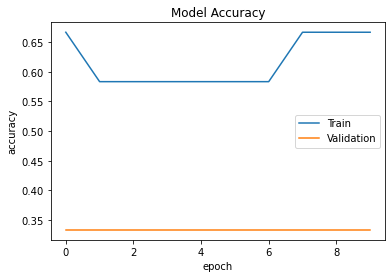

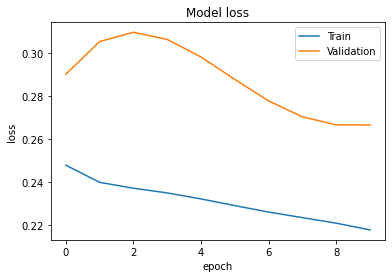

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [19]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)*1
y_pred

1/1 [==============================] - 0s 208ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]])

In [20]:
y_pred = model.predict(X_test).round()
y_pred

1/1 [==============================] - 0s 32ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [21]:
print(" Accuracy ",accuracy_score(y_test,y_pred))
print(" Precision ",precision_score(y_test,y_pred))
print(" Recall ",recall_score(y_test,y_pred))
print(" AUC ",roc_auc_score(y_test,y_pred))

 Accuracy  0.4
 Precision  0.0
 Recall  0.0
 AUC  0.5


### 5. Run different Neural Network models

In [22]:
def c_model(node):
    model=Sequential()
    model.add(Dense(128, activation='tanh', input_shape=(12,)))
    model.add(Dense(node, activation='tanh'))
    model.add(Dense(node, activation='tanh'))
    model.add(Dense(node, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
    history=model.fit(X_train, y_train, batch_size=batch_size, epochs=10 , verbose=2,validation_split=0.2)
    score=model.evaluate(X_test,y_test,verbose=0)
    print("loss ", score[0])
    print("accuracy ",score[1])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 dense_7 (Dense)             (None, 8)                 1032      
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,921
Trainable params: 2,921
Non-traina

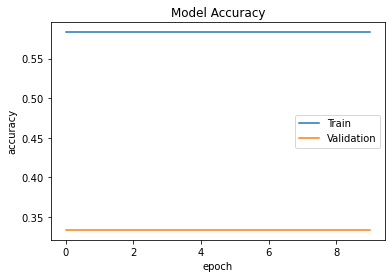

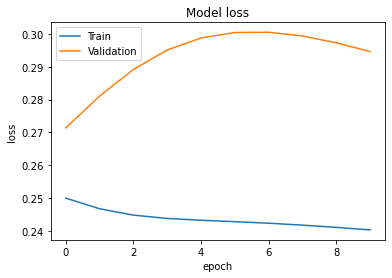

In [23]:
c_model(8)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1664      
                                                                 
 dense_13 (Dense)            (None, 16)                2064      
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-traina

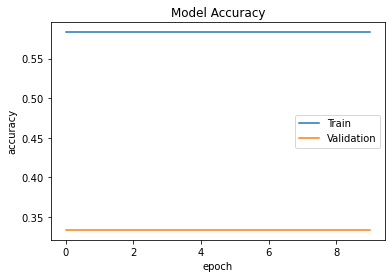

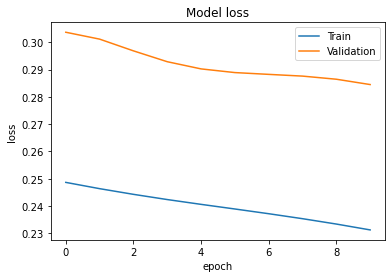

In [24]:
c_model(16)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1664      
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 8)                 264       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8,177
Trainable params: 8,177
Non-traina

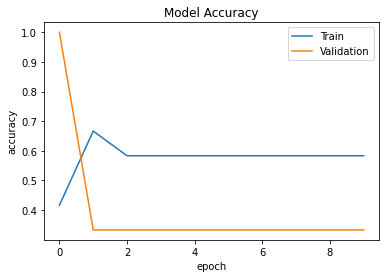

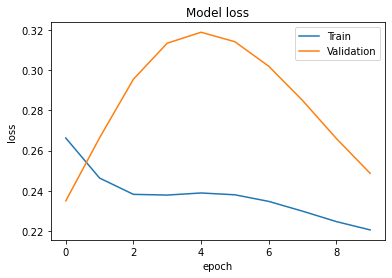

In [25]:
c_model(32)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1664      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,769
Trainable params: 18,769
Non-trai

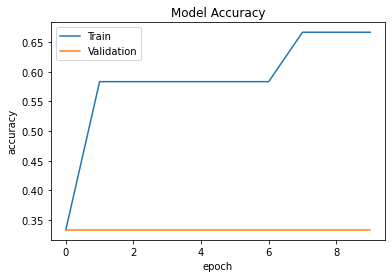

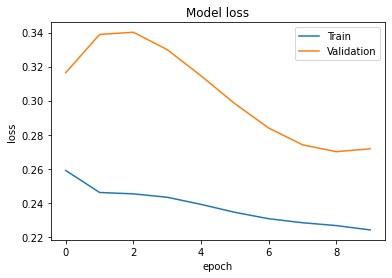

In [26]:
c_model(64)

In [27]:
def c_layer(n):
    model=Sequential()
    model.add(Dense(128, activation='tanh', input_shape=(12,)))
    for i in range(0,n):
        model.add(Dense(32, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='mean_squared_error',metrics=['accuracy'],optimizer='adam')
    history=model.fit(X_train, y_train, batch_size=batch_size, epochs=50 , verbose=2,validation_split=0.2)
    score=model.evaluate(X_test,y_test,verbose=0)
    print("loss ", score[0])
    print("accuracy ",score[1])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1664      
                                                                 
 dense_31 (Dense)            (None, 32)                4128      
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,881
Trainable params: 6,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 1s - loss: 0.2505 - accuracy: 0.5833 - val_loss: 0.2742 - val_accuracy: 0.3333 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 0.2417 - accuracy: 0.5833 - val_loss: 0

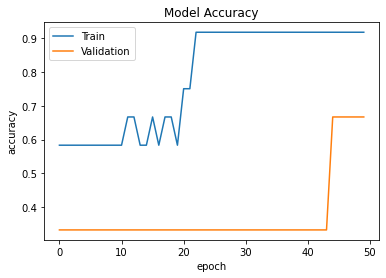

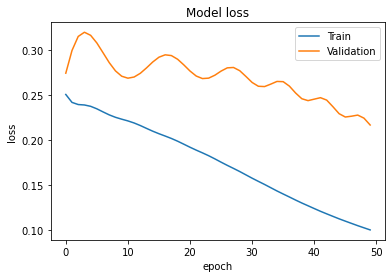

In [28]:
c_layer(2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               1664      
                                                                 
 dense_35 (Dense)            (None, 32)                4128      
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 - 1s - loss: 0.2584 - accuracy: 0.416

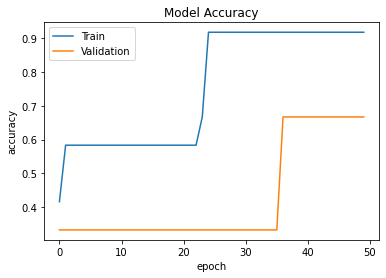

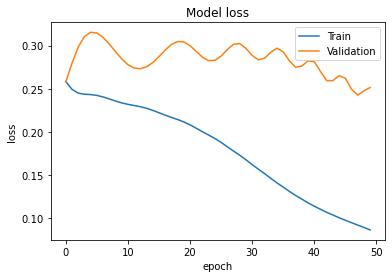

In [29]:
c_layer(3)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1664      
                                                                 
 dense_40 (Dense)            (None, 32)                4128      
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 32)                1056      
                                                                 
 dense_44 (Dense)            (None, 32)                1056      
                                                                 
 dense_45 (Dense)            (None, 1)                

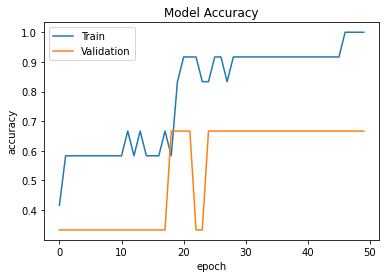

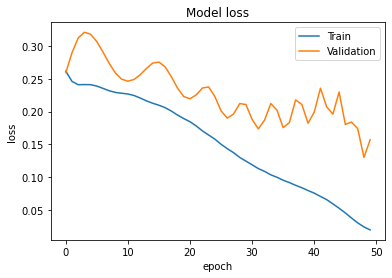

In [30]:
c_layer(5)